In [1]:
# Exploratory Data Analysis and Plotting Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-Learn Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

In [2]:
df = pd.read_csv("heart.csv")
df.shape  # (rows, columns)

(303, 14)

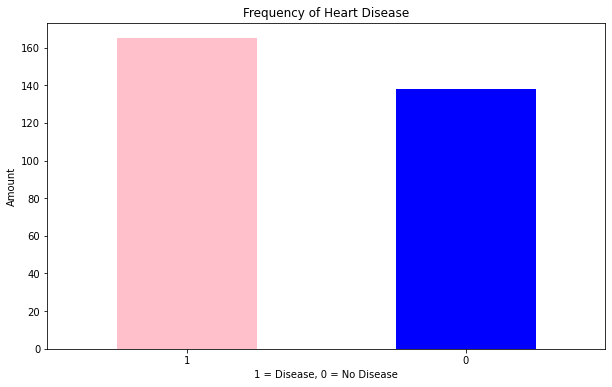

In [3]:
df.target.value_counts().plot(kind='bar', figsize=(10, 6), color=['pink', 'blue'])
plt.title('Frequency of Heart Disease')
plt.xlabel('1 = Disease, 0 = No Disease')
plt.ylabel('Amount')
plt.xticks(rotation=0);

In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
# sex: (1 = male; 0 = female)
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

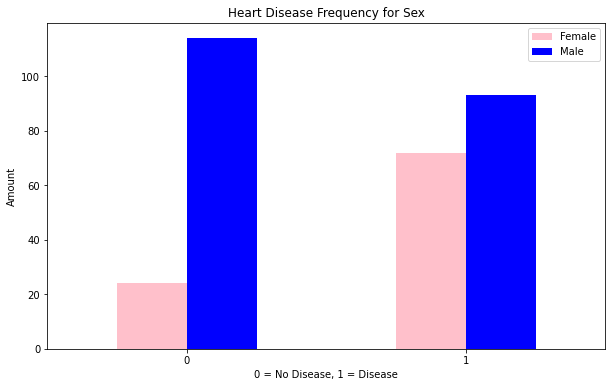

In [6]:
pd.crosstab(df.target, df.sex).plot(kind='bar',
                                   figsize=(10, 6),
                                   color=['pink', 'blue'])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('0 = No Disease, 1 = Disease')
plt.ylabel('Amount')
plt.legend(['Female', 'Male']);
plt.xticks(rotation=0);

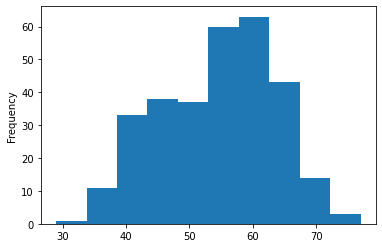

In [7]:
df.age.plot.hist();

In [8]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


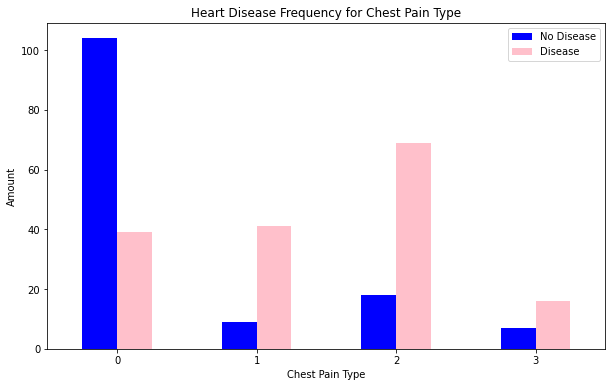

In [9]:
pd.crosstab(df.cp, df.target).plot(kind='bar',
                                   figsize=(10, 6),
                                   color=['blue', 'pink'])
plt.title('Heart Disease Frequency for Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Amount')
plt.legend(['No Disease', 'Disease']);
plt.xticks(rotation=0);

In [10]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


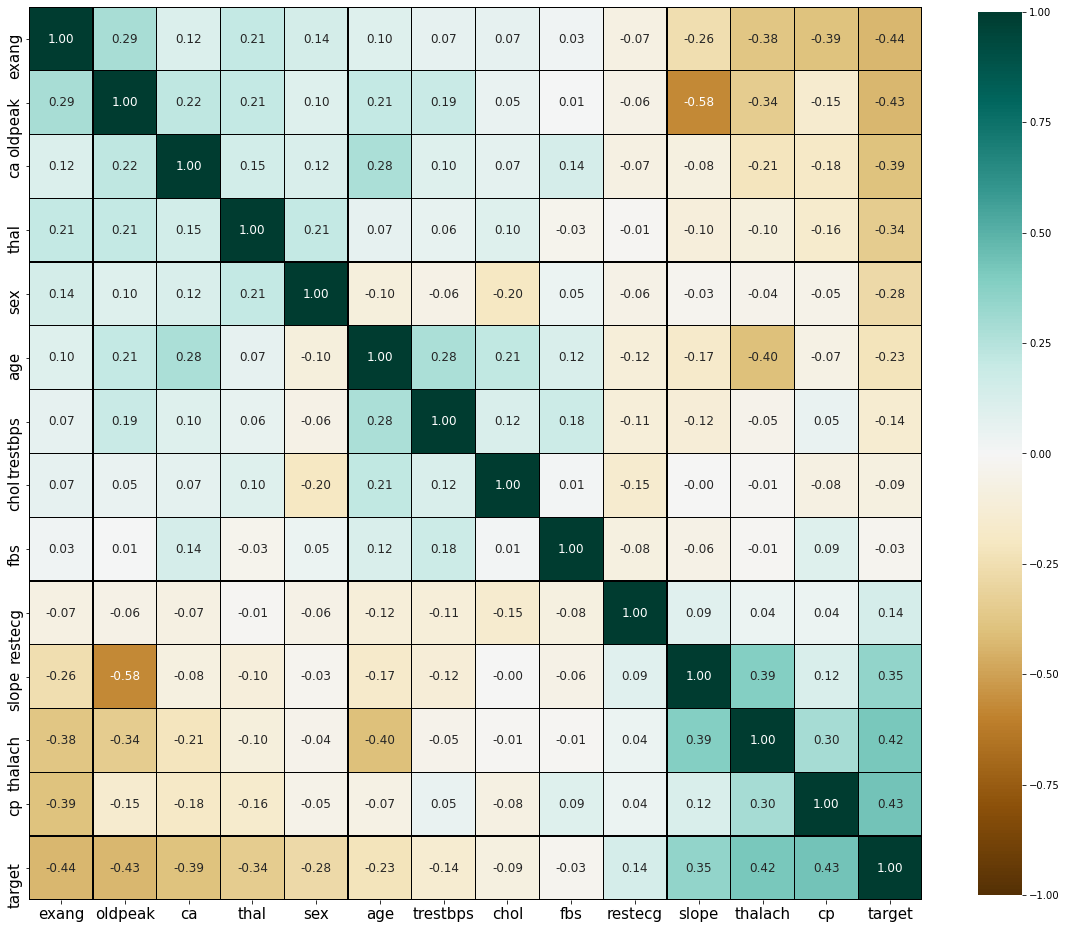

In [11]:
ix = df.corr().sort_values('target', ascending=True).index
df_sorted = df.loc[:, ix]
corrmat = df_sorted.corr()
fig, ax = plt.subplots(figsize=(20, 25))
g = sns.heatmap(corrmat, vmin=-1.0, vmax=1.0, square=True, annot=True, fmt='.2f', annot_kws={'size': 12}, cbar_kws= {'shrink': 0.65}, linecolor='black', center=0, linewidths=.25, cmap='BrBG')
g.tick_params(labelsize=15)

In [12]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [13]:
X = df.drop('target', axis=1)
y = df.target

In [14]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [15]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [16]:
np.random.seed(33)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [17]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(242, 13) (242,) (61, 13) (61,)


In [18]:
# Put models in dictionary
models = {'Logistic Regression': LogisticRegression(solver='lbfgs', max_iter=1000),
         'KNN': KNeighborsClassifier(),
         'Random Forest': RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    # Set random seed
    np.random.seed(33)
    # Make dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [19]:
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)
model_scores

{'Logistic Regression': 0.8360655737704918,
 'KNN': 0.5245901639344263,
 'Random Forest': 0.819672131147541}

In [20]:
# Tuning KNN
train_scores = []
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1, 21)

# Create KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors = i)
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the training scores list
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the testing scores list
    test_scores.append(knn.score(X_test, y_test))

In [21]:
train_scores

[1.0,
 0.8181818181818182,
 0.7933884297520661,
 0.7975206611570248,
 0.8057851239669421,
 0.78099173553719,
 0.768595041322314,
 0.7603305785123967,
 0.7396694214876033,
 0.7231404958677686,
 0.731404958677686,
 0.731404958677686,
 0.7355371900826446,
 0.7272727272727273,
 0.7024793388429752,
 0.71900826446281,
 0.7148760330578512,
 0.7272727272727273,
 0.7231404958677686,
 0.7148760330578512]

In [22]:
test_scores

[0.47540983606557374,
 0.45901639344262296,
 0.47540983606557374,
 0.4918032786885246,
 0.5245901639344263,
 0.5737704918032787,
 0.5573770491803278,
 0.5737704918032787,
 0.5409836065573771,
 0.5573770491803278,
 0.5409836065573771,
 0.5409836065573771,
 0.5573770491803278,
 0.5737704918032787,
 0.5245901639344263,
 0.5409836065573771,
 0.5245901639344263,
 0.5081967213114754,
 0.5245901639344263,
 0.5409836065573771]

Maximum KNN score on the test data: 57.38%


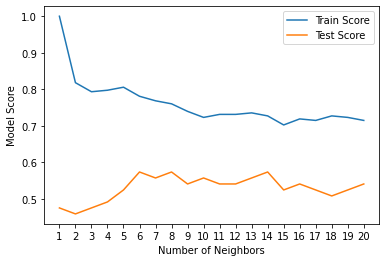

In [23]:
plt.plot(neighbors, train_scores, label='Train Score')
plt.plot(neighbors, test_scores, label='Test Score')
plt.xticks(np.arange(1, 21, 1))
plt.xlabel('Number of Neighbors')
plt.ylabel('Model Score')
plt.legend()

print(f'Maximum KNN score on the test data: {max(test_scores)*100:.2f}%')

In [24]:
rf_grid = {'n_estimators': np.arange(100, 102, 1), 
          'max_depth': np.arange(5, 10, 1),
          'min_samples_split': np.arange(10, 15, 1),
          'min_samples_leaf': np.arange(10, 15, 1),
          'n_jobs': [-1]}

In [25]:
gs_rf = GridSearchCV(RandomForestClassifier(),
                               param_grid=rf_grid,
                               cv=5,
                               verbose=True)

# Fit random hyperparameter search model
gs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 250 candidates, totalling 1250 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': array([5, 6, 7, 8, 9]),
                         'min_samples_leaf': array([10, 11, 12, 13, 14]),
                         'min_samples_split': array([10, 11, 12, 13, 14]),
                         'n_estimators': array([100, 101]), 'n_jobs': [-1]},
             verbose=True)

In [26]:
gs_rf.best_params_

{'max_depth': 5,
 'min_samples_leaf': 10,
 'min_samples_split': 10,
 'n_estimators': 101,
 'n_jobs': -1}

In [27]:
gs_rf.score(X_test, y_test)

0.819672131147541

In [28]:
y_preds = gs_rf.predict(X_test)

In [29]:
y_preds

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1], dtype=int64)

In [30]:
y_test

249    0
294    0
273    0
204    0
81     1
      ..
237    0
254    0
38     1
174    0
241    0
Name: target, Length: 61, dtype: int64

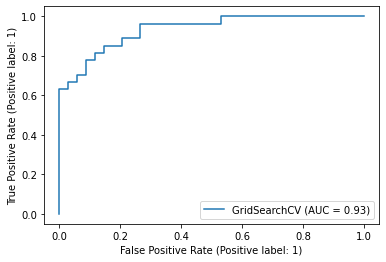

In [31]:
plot_roc_curve(gs_rf, X_test, y_test);

In [32]:
print(confusion_matrix(y_test, y_preds))

[[26  8]
 [ 3 24]]


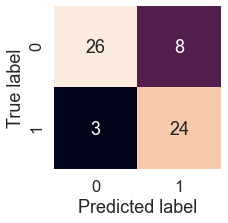

In [33]:
sns.set(font_scale=1.5) # Increase font size
 
def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("Predicted label") # predictions go on the x-axis
    plt.ylabel("True label") # true labels go on the y-axis 
    
plot_conf_mat(y_test, y_preds)

In [34]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.90      0.76      0.83        34
           1       0.75      0.89      0.81        27

    accuracy                           0.82        61
   macro avg       0.82      0.83      0.82        61
weighted avg       0.83      0.82      0.82        61



In [35]:
best_params = gs_rf.best_params_
best_params

{'max_depth': 5,
 'min_samples_leaf': 10,
 'min_samples_split': 10,
 'n_estimators': 101,
 'n_jobs': -1}

In [36]:
clf = RandomForestClassifier(n_estimators=best_params['n_estimators'],
                             min_samples_split=best_params['min_samples_split'],
                             min_samples_leaf=best_params['min_samples_leaf'],
                             max_depth=best_params['max_depth'],
                             n_jobs=best_params['n_jobs'])

In [37]:
cv_acc = cross_val_score(clf, X, y, scoring='accuracy')
cv_acc

array([0.81967213, 0.8852459 , 0.85245902, 0.88333333, 0.78333333])

In [38]:
cv_acc = np.mean(cv_acc)
cv_acc

0.844808743169399

In [39]:
cv_precision = cross_val_score(clf, X, y, scoring='precision')
cv_precision = np.mean(cv_precision)
cv_precision

0.8430648193063304

In [40]:
cv_recall = cross_val_score(clf, X, y, scoring='recall')
cv_recall = np.mean(cv_recall)
cv_recall

0.8787878787878787

In [41]:
cv_f1 = cross_val_score(clf, X, y, scoring='f1')
cv_f1 = np.mean(cv_f1)
cv_f1

0.841601635079896

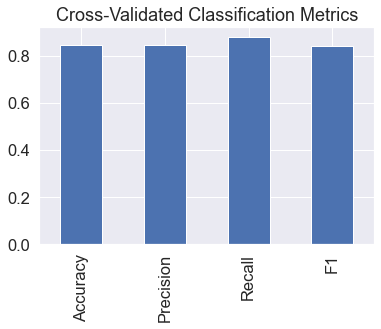

In [42]:
cv_metrics = pd.DataFrame({'Accuracy': cv_acc,
                          'Precision': cv_precision,
                          'Recall': cv_recall,
                          'F1': cv_f1},
                         index=[0])

cv_metrics.T.plot.bar(title='Cross-Validated Classification Metrics',
                     legend=False);

In [43]:
best_params = gs_rf.best_params_
best_params

{'max_depth': 5,
 'min_samples_leaf': 10,
 'min_samples_split': 10,
 'n_estimators': 101,
 'n_jobs': -1}

In [44]:
# Different parameters for our RandomForestClassifier model
rf_grid = {'n_estimators': [102], 
          'max_depth': [6],
          'min_samples_split': [14],
          'min_samples_leaf': [13],
          'n_jobs': [-1],
          'max_features': range(1, 14),}

# Create hyperparameter search
gs_rf = GridSearchCV(RandomForestClassifier(),
                               param_grid=rf_grid,
                               cv=5,
                               verbose=True)

# Fit hyperparameter search model
gs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 13 candidates, totalling 65 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [6], 'max_features': range(1, 14),
                         'min_samples_leaf': [13], 'min_samples_split': [14],
                         'n_estimators': [102], 'n_jobs': [-1]},
             verbose=True)

In [45]:
best_params = gs_rf.best_params_
best_params

{'max_depth': 6,
 'max_features': 1,
 'min_samples_leaf': 13,
 'min_samples_split': 14,
 'n_estimators': 102,
 'n_jobs': -1}

In [46]:
model = RandomForestClassifier(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"],
                                  max_features=best_params["max_features"], min_samples_leaf=best_params["min_samples_leaf"],
                               min_samples_split=best_params['min_samples_split'], n_jobs=-1,
                                  random_state=33)

In [47]:
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, max_features=1, min_samples_leaf=13,
                       min_samples_split=14, n_estimators=102, n_jobs=-1,
                       random_state=33)

In [48]:
model.score(X_test, y_test)

0.8032786885245902

In [49]:
model.feature_importances_

array([0.09285389, 0.05163157, 0.10854274, 0.03736272, 0.04909007,
       0.00341074, 0.02747327, 0.09322888, 0.09219167, 0.10972336,
       0.0924999 , 0.11004337, 0.13194783])

In [50]:
X.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [51]:
feat_importance = []
for feature in zip(X.columns, model.feature_importances_):
        feat_importance.append(feature)

In [52]:
importance = pd.DataFrame(feat_importance,columns=["Feature", "Importance"])
print(importance.sort_values(by=["Importance"],ascending=False))

     Feature  Importance
12      thal    0.131948
11        ca    0.110043
9    oldpeak    0.109723
2         cp    0.108543
7    thalach    0.093229
0        age    0.092854
10     slope    0.092500
8      exang    0.092192
1        sex    0.051632
4       chol    0.049090
3   trestbps    0.037363
6    restecg    0.027473
5        fbs    0.003411


In [53]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(n_estimators=100, base_estimator=model, learning_rate=1)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8032786885245902

In [54]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=5)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7540983606557377

In [55]:
!pip install xgboost

In [56]:
from xgboost import XGBClassifier

clf = XGBClassifier()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

[15:28:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\ayshw\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.819672131147541

In [57]:
import pickle

clf = AdaBoostClassifier(n_estimators=100, base_estimator=model, learning_rate=1)
clf.fit(X_train, y_train)

pickle.dump(clf, open('./heart.pkl','wb'))

In [63]:
input_data = input("Enter the values in the following order age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target : ")
input_data = input_data.split(',')
input_data = map(float , input_data)
input_data = np.asarray(list(input_data))
input_data = input_data.reshape(1,-1)
prediction =model.predict(input_data)
if prediction[0] == 0:
  print('Congratulation! You do not have heart dieases')
else:
  print('You may have heart dieases, Pleace consult your Doctor!')

Enter the values in the following order age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target : 62,0,0,138,294,1,1,106,0,1.9,1,3,2
Congratulation! You do not have heart dieases


In [64]:
input_data = input("Enter the values in the following order age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target : ")
input_data = input_data.split(',')
input_data = map(float , input_data)
input_data = np.asarray(list(input_data))
input_data = input_data.reshape(1,-1)
prediction =model.predict(input_data)
if prediction[0] == 0:
  print('Congratulation! You do not have heart dieases')
else:
  print('You may have heart dieases, Pleace consult your Doctor!')

Enter the values in the following order age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target : 49,1,1,130,266,0,1,171,0,0.6,2,0,2
You may have heart dieases, Pleace consult your Doctor!
